In [1]:
import seaborn as sns


In [2]:
df=sns.load_dataset('diamonds')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [7]:
from pandas.api.types import CategoricalDtype

In [8]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [9]:
df.cut.head

<bound method NDFrame.head of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']>

In [10]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))

In [11]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

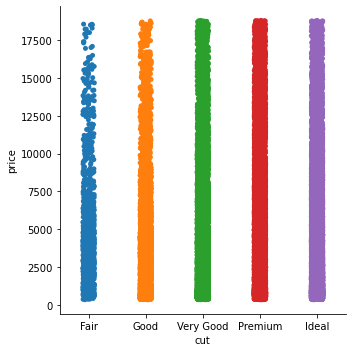

In [12]:
sns.catplot(x="cut",y="price",data=df);

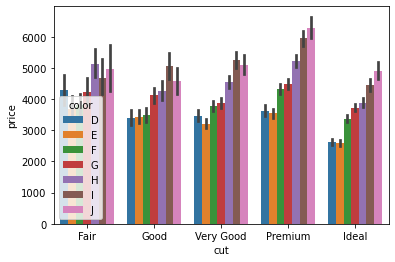

In [13]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [14]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

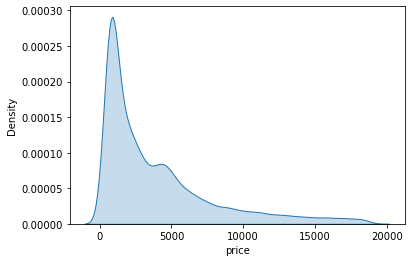

In [15]:
sns.kdeplot(df.price,shade=True);

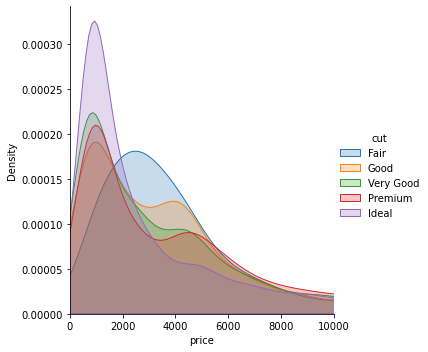

In [16]:
sns.FacetGrid(df,hue="cut",height=5,xlim=(0,10000)).map(sns.kdeplot,"price",shade="True").add_legend();

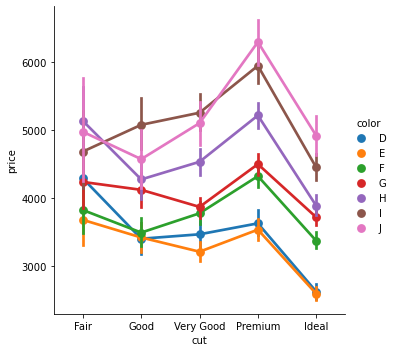

In [17]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

In [59]:
df_table=df["table"]

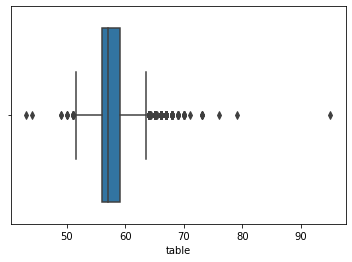

In [60]:
sns.boxplot(x=df_table);

In [28]:
q1=df_table.quantile(0.25)
q3=df_table.quantile(0.75)
ıqor=(q3-q1)

In [24]:
q1

56.0

In [25]:
q3

59.0

In [29]:
alt_sınır=q1-1.5*ıqor

In [30]:
alt_sınır

51.5

In [31]:
ust_sınır=q3-1.5*ıqor

In [32]:
ust_sınır

54.5

In [51]:
aykırı=(df_table<alt_sınır ) 


In [52]:
table[aykırı]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [57]:
aykırı1=(df_table>ust_sınır)

In [58]:
df_table[aykırı1].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938,
            53939],
           dtype='int64', length=50441)

In [64]:
import pandas as pd

In [65]:
df_table=pd.DataFrame(df_table)

In [70]:
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [71]:
df_temiz=df_table[((df_table<(alt_sınır))|(df_table>(ust_sınır))).any(axis=1)]

In [72]:
df_temiz

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [73]:
df_table[aykırı]=df_table.mean()

In [74]:
df_table[aykırı]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184
